In [293]:
#Importing libraries
!pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [294]:
#Load the data

In [295]:
url = "https://raw.githubusercontent.com/VimalVarun/Dara-set/main/Alphabets_data.csv"

In [296]:
df = pd.read_csv(url)

In [297]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [298]:
#EDA (Exploratory Data Analysis)

In [299]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [300]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [301]:
df.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [303]:
df.duplicated().sum()

1332

In [304]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [305]:
df[df.duplicated(keep=False)]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
22,S,3,2,3,3,2,8,8,7,5,7,5,7,2,8,9,8
37,P,3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8
51,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
60,N,3,3,3,5,2,7,7,13,2,5,6,8,5,8,0,8
67,E,2,3,3,2,2,7,7,5,7,7,6,8,2,8,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [306]:
df.drop_duplicates(inplace=True)

In [307]:
df.shape

(18668, 17)

In [308]:
df.duplicated().sum()

0

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns

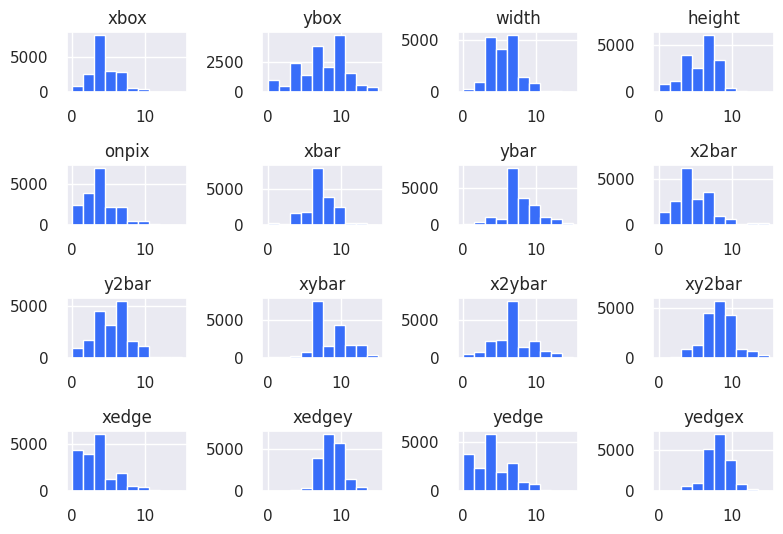

In [310]:
df.hist()
plt.tight_layout()

<Axes: >

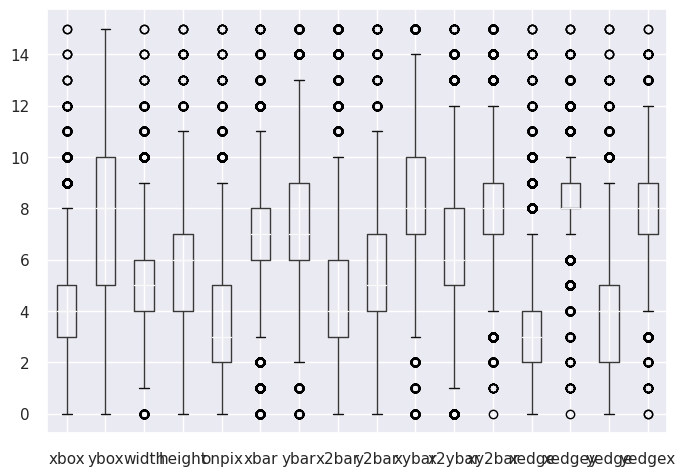

In [311]:
df.boxplot()

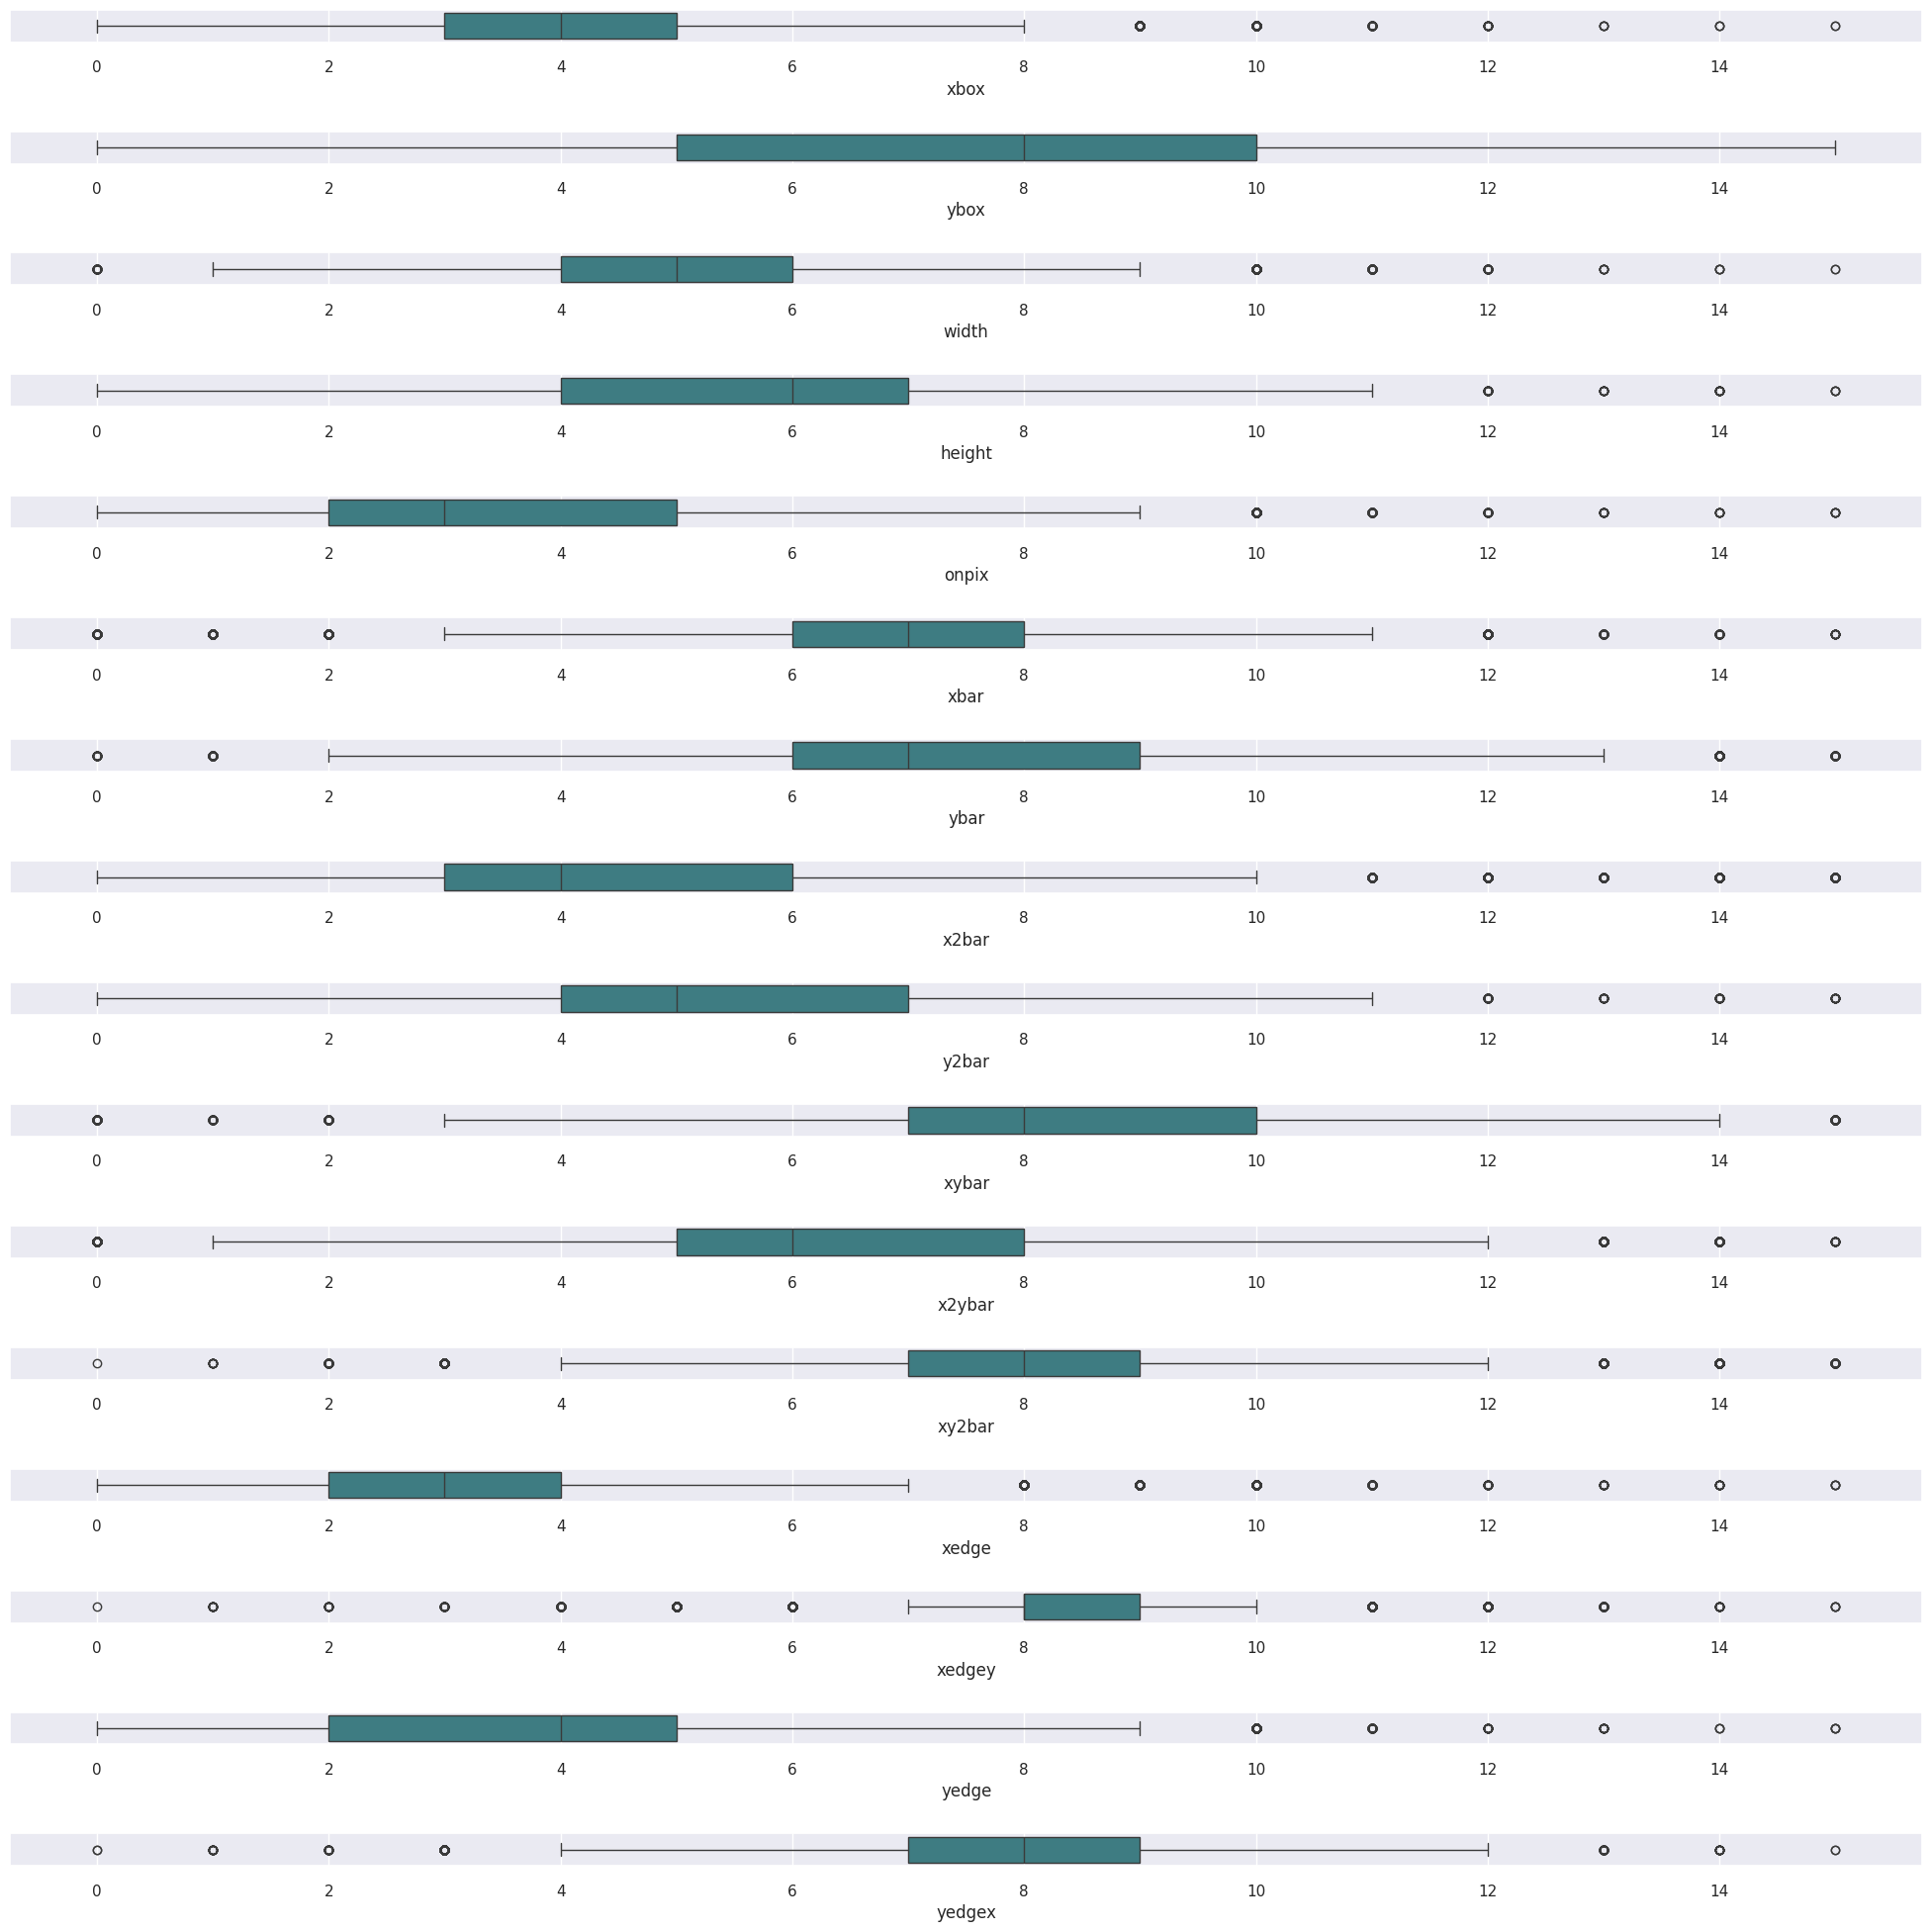

In [312]:
ot=df.copy()
fig, axes=plt.subplots(16,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='xbox',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='ybox',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='width',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='height',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='onpix',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='xbar',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='ybar',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='x2bar',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='y2bar',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='xybar',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='x2ybar',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='xy2bar',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='xedge',data=ot,palette='crest',ax=axes[12])
sns.boxplot(x='xedgey',data=ot,palette='crest',ax=axes[13])
sns.boxplot(x='yedge',data=ot,palette='crest',ax=axes[14])
sns.boxplot(x='yedgex',data=ot,palette='crest',ax=axes[15])
plt.tight_layout(pad=2.0)

In [313]:
#Outlier_detection function

In [314]:
def Outlier_detection (data, colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3-q1

  upper = q3+(1.5*iqr)
  lower = q1-(1.5*iqr)

  return lower, upper

In [315]:
Outlier_detection(df,"xbox")

(0.0, 8.0)

Text(0.5, 1.0, 'Before the outlier replace with upper extreme values')

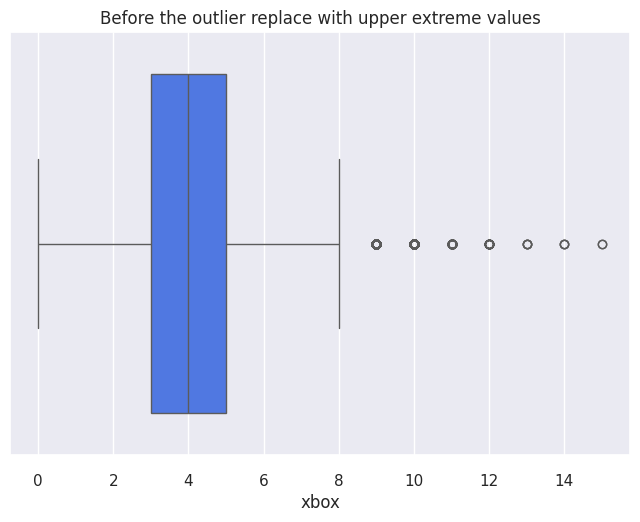

In [316]:
sns.boxplot(x = df ["xbox"])
plt.xlabel("xbox")
plt.title("Before the outlier replace with upper extreme values")

In [317]:
df.loc[df["xbox"]>8.0, "xbox"] = 8.0

Text(0.5, 1.0, 'After the outlier replaced with upper extreme values')

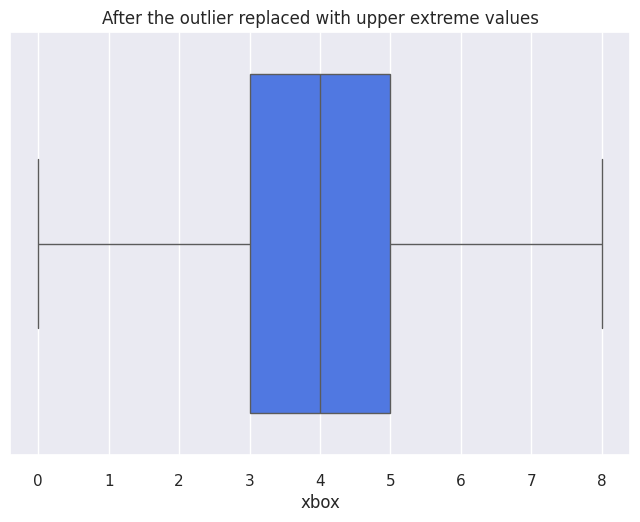

In [318]:
sns.boxplot(x = df ["xbox"])
plt.xlabel("xbox")
plt.title("After the outlier replaced with upper extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

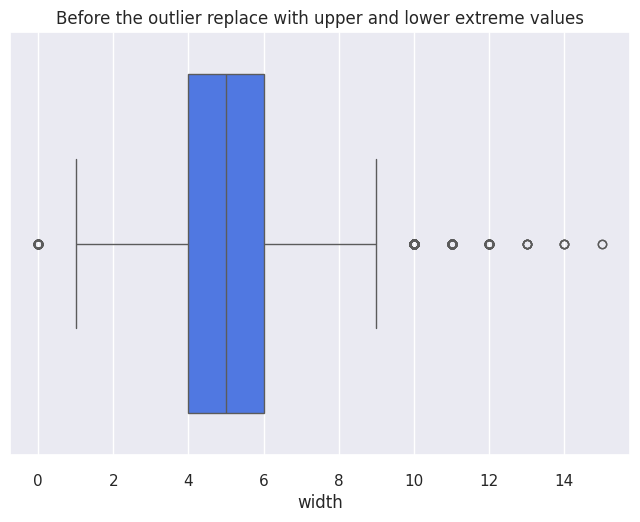

In [319]:
sns.boxplot(x = df["width"])
plt.xlabel("width")
plt.title("Before the outlier replace with upper and lower extreme values")

In [320]:
Outlier_detection(df, "width")

(1.0, 9.0)

In [321]:
df.loc[df["width"]>9.0, "width"] = 9.0

In [322]:
len(df.loc[df["width"]<1.0, "width"])

48

In [323]:
df.loc[df["width"]<1.0, "width"] = 1.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

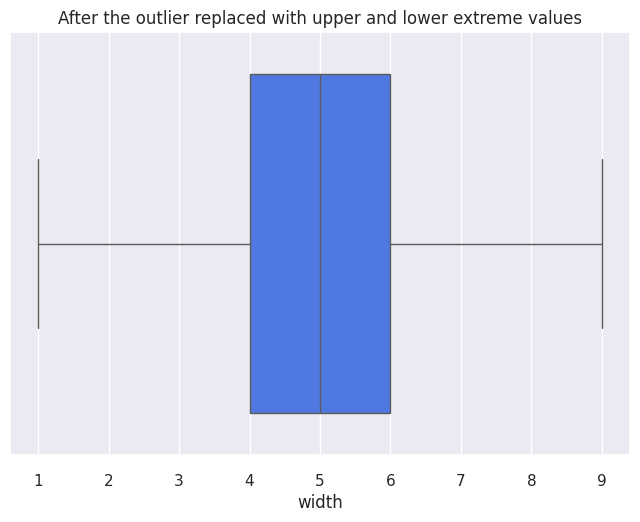

In [324]:
sns.boxplot(x = df["width"])
plt.xlabel("width")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

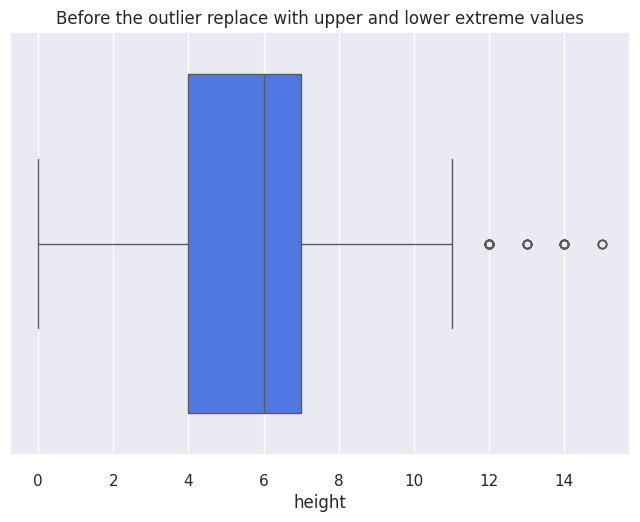

In [325]:
sns.boxplot(x = df["height"])
plt.xlabel("height")
plt.title("Before the outlier replace with upper and lower extreme values")

In [326]:
Outlier_detection(df, "height")

(-0.5, 11.5)

In [327]:
len(df.loc[df["height"]>11.5, "height"])

60

In [328]:
df.loc[df["height"]>11.5, "height"] = 11.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

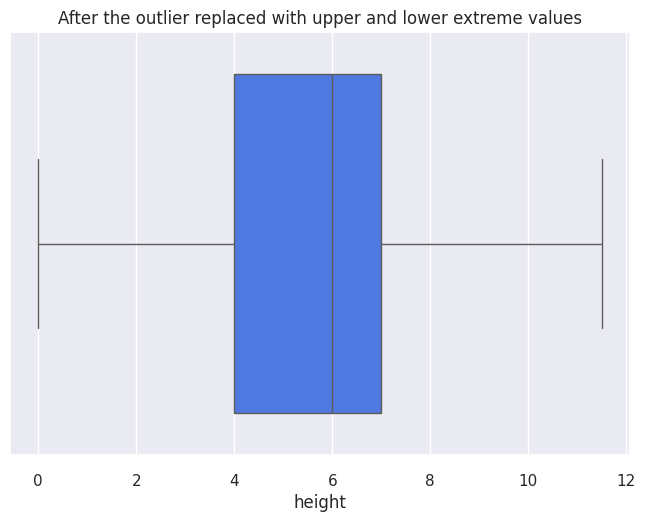

In [329]:
sns.boxplot(x = df["height"])
plt.xlabel("height")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

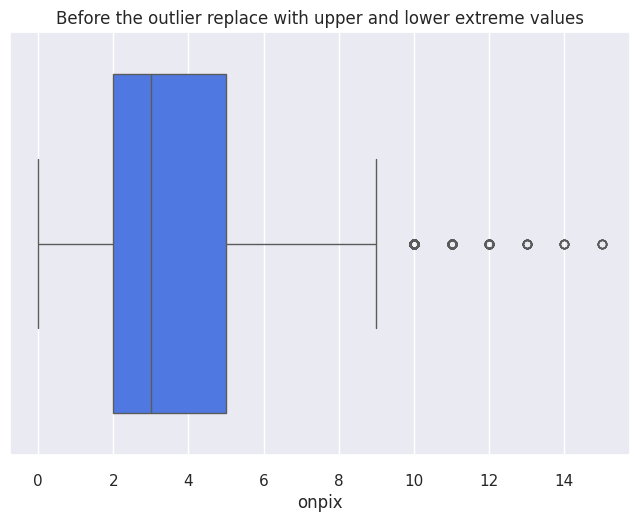

In [330]:
sns.boxplot(x = df["onpix"])
plt.xlabel("onpix")
plt.title("Before the outlier replace with upper and lower extreme values")

In [331]:
Outlier_detection(df, "onpix")

(-2.5, 9.5)

In [332]:
df.loc[df["onpix"]>9.5, "onpix"] = 9.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

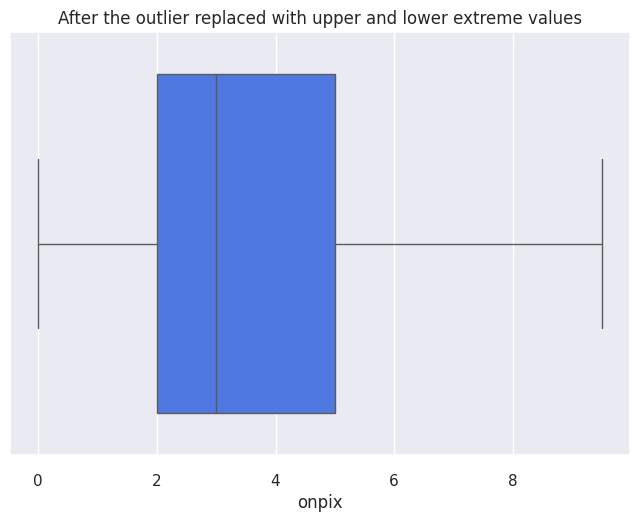

In [333]:
sns.boxplot(x = df["onpix"])
plt.xlabel("onpix")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

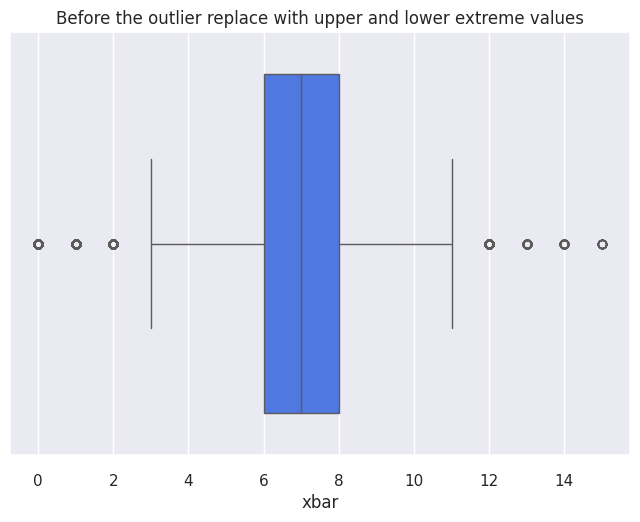

In [334]:
sns.boxplot(x = df["xbar"])
plt.xlabel("xbar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [335]:
Outlier_detection(df, "xbar")

(3.0, 11.0)

In [336]:
df.loc[df["xbar"]>11.0, "xbar"] = 11.0

In [337]:
df.loc[df["xbar"]<3.0, "xbar"] = 3.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

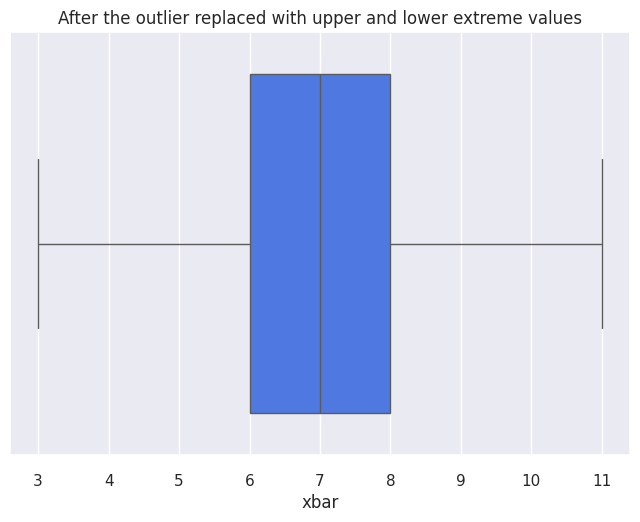

In [338]:
sns.boxplot(x = df["xbar"])
plt.xlabel("xbar")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

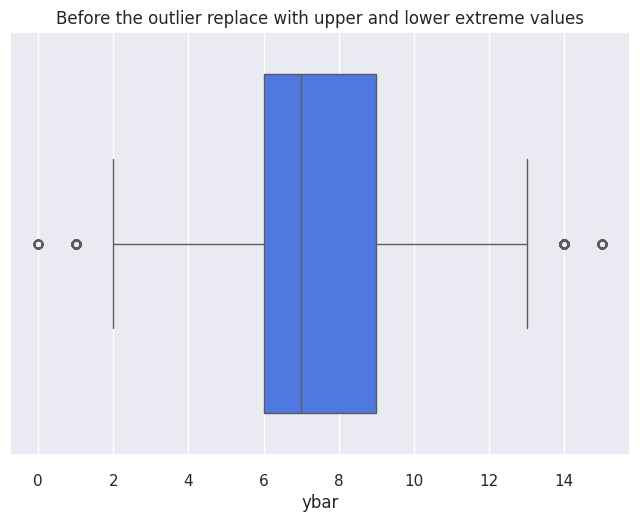

In [339]:
sns.boxplot(x = df["ybar"])
plt.xlabel("ybar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [340]:
Outlier_detection(df, "ybar")

(1.5, 13.5)

In [341]:
df.loc[df["ybar"]>13.5, "ybar"] = 13.5

In [342]:
df.loc[df["ybar"]<1.5, "ybar"] = 1.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

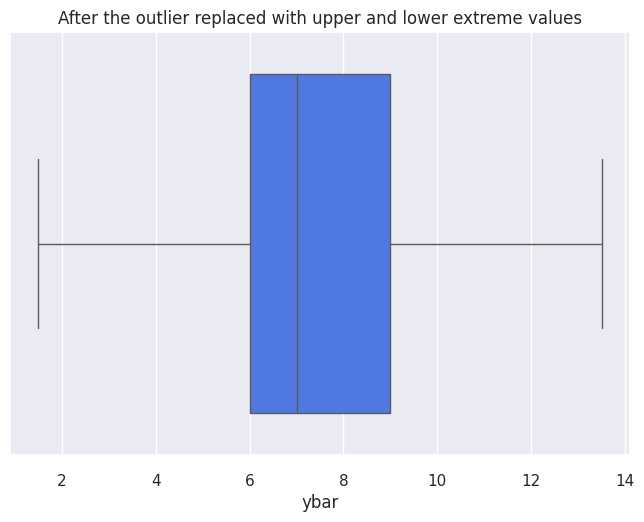

In [343]:
sns.boxplot(x = df["ybar"])
plt.xlabel("ybar")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

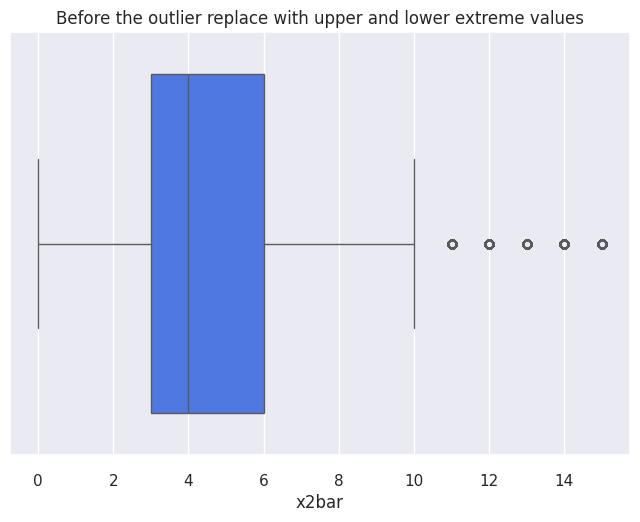

In [344]:
sns.boxplot(x = df["x2bar"])
plt.xlabel("x2bar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [345]:
Outlier_detection(df, "x2bar")

(-1.5, 10.5)

In [346]:
df.loc[df["x2bar"]>10.5, "x2bar"] = 10.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

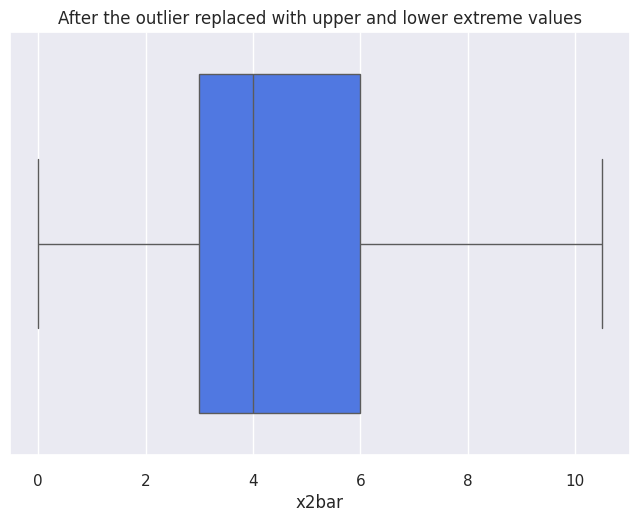

In [347]:
sns.boxplot(x = df["x2bar"])
plt.xlabel("x2bar")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

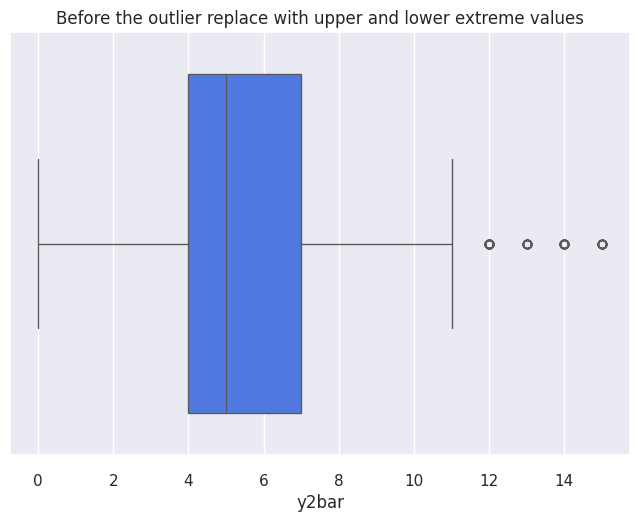

In [348]:
sns.boxplot(x = df["y2bar"])
plt.xlabel("y2bar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [349]:
Outlier_detection(df, "y2bar")

(-0.5, 11.5)

In [350]:
df.loc[df["y2bar"]>11.5, "y2bar"] = 11.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

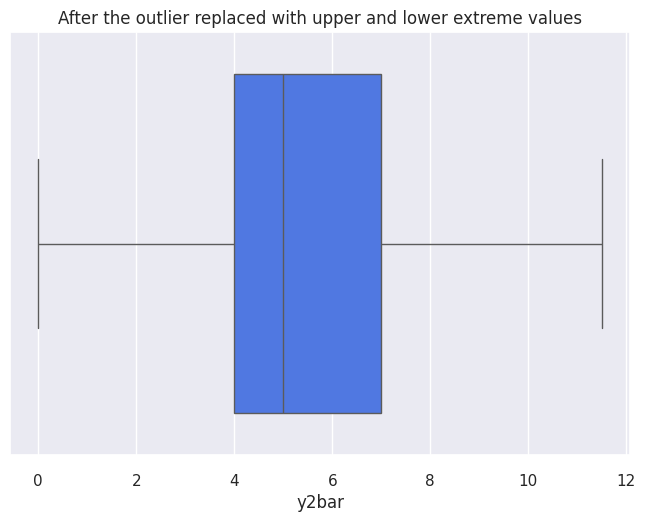

In [351]:
sns.boxplot(x = df["y2bar"])
plt.xlabel("y2bar")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

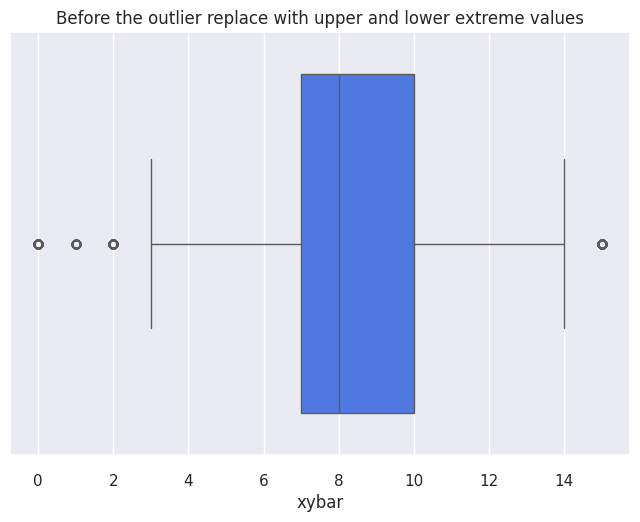

In [352]:
sns.boxplot(x = df["xybar"])
plt.xlabel("xybar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [353]:
Outlier_detection(df, "xybar")

(2.5, 14.5)

In [354]:
df.loc[df["xybar"]>14.5, "xybar"] = 14.5

In [355]:
df.loc[df["xybar"]<2.5, "xybar"] = 2.5

Text(0.5, 1.0, 'After the outlier replace with upper and lower extreme values')

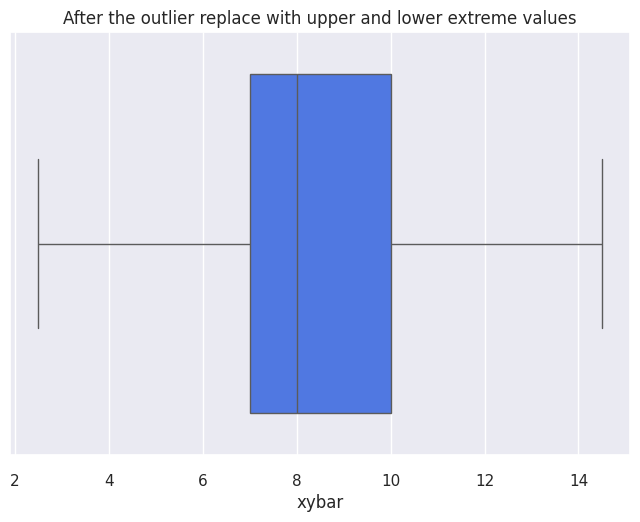

In [356]:
sns.boxplot(x = df["xybar"])
plt.xlabel("xybar")
plt.title("After the outlier replace with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

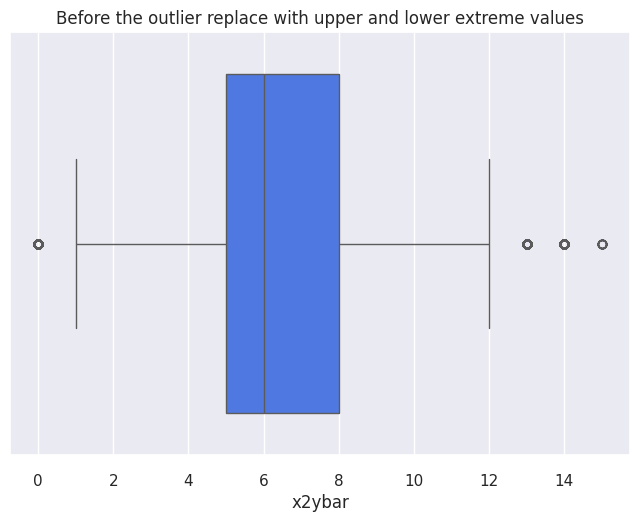

In [357]:
sns.boxplot(x = df["x2ybar"])
plt.xlabel("x2ybar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [358]:
Outlier_detection(df, "x2ybar")

(0.5, 12.5)

In [359]:
df.loc[df["x2ybar"]>12.5, "x2ybar"] = 12.5

In [360]:
df.loc[df["x2ybar"]<0.5, "x2ybar"] = 0.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

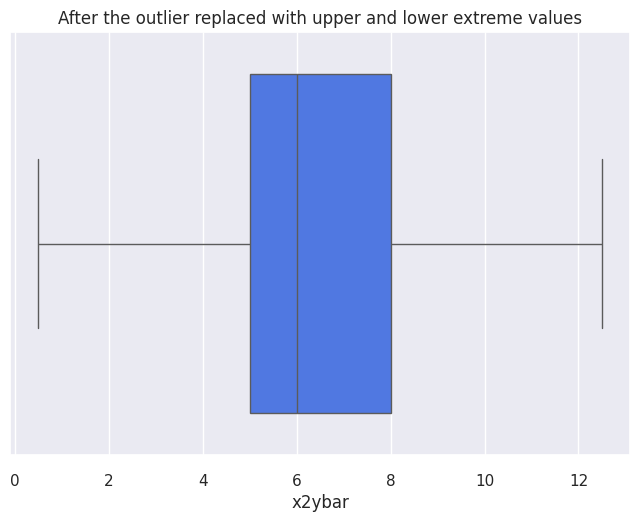

In [361]:
sns.boxplot(x = df["x2ybar"])
plt.xlabel("x2ybar")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

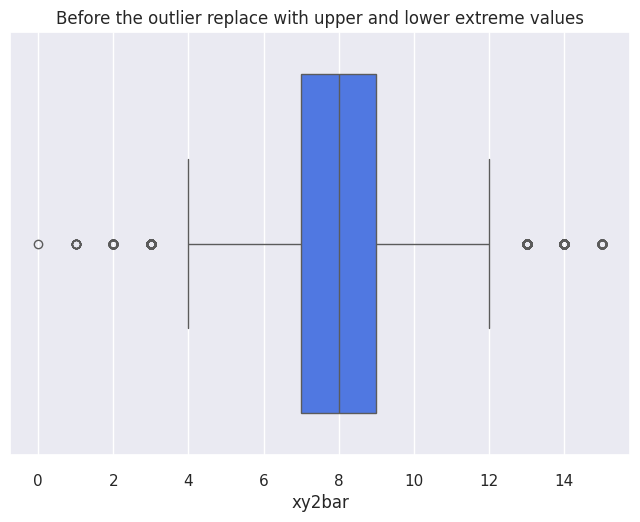

In [362]:
sns.boxplot(x = df["xy2bar"])
plt.xlabel("xy2bar")
plt.title("Before the outlier replace with upper and lower extreme values")

In [363]:
Outlier_detection(df, "xy2bar")

(4.0, 12.0)

In [364]:
df.loc[df["xy2bar"]>12.0, "xy2bar"] = 12.0

In [365]:
df.loc[df["xy2bar"]<4.0, "xy2bar"] = 4.0

Text(0.5, 1.0, 'After the outlier replace with upper and lower extreme values')

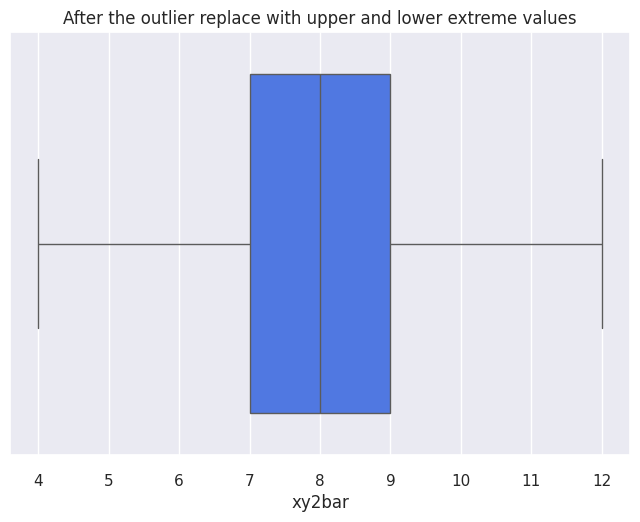

In [366]:
sns.boxplot(x = df["xy2bar"])
plt.xlabel("xy2bar")
plt.title("After the outlier replace with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

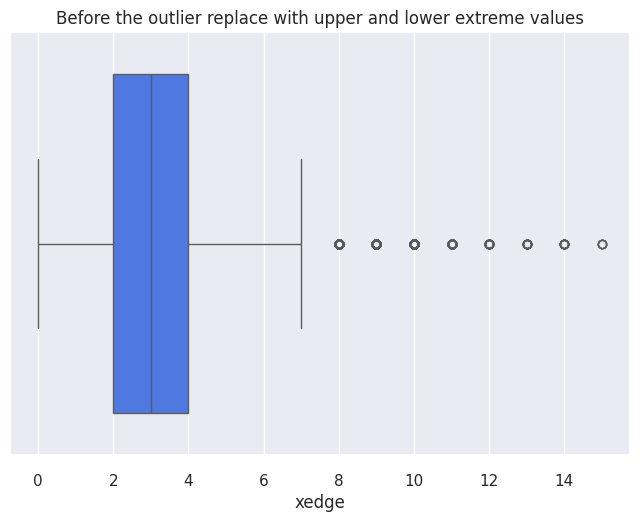

In [367]:
sns.boxplot(x = df["xedge"])
plt.xlabel("xedge")
plt.title("Before the outlier replace with upper and lower extreme values")

In [368]:
Outlier_detection(df, "xedge")

(-1.0, 7.0)

In [369]:
df.loc[df["xedge"]>7.0, "xedge"] = 7.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

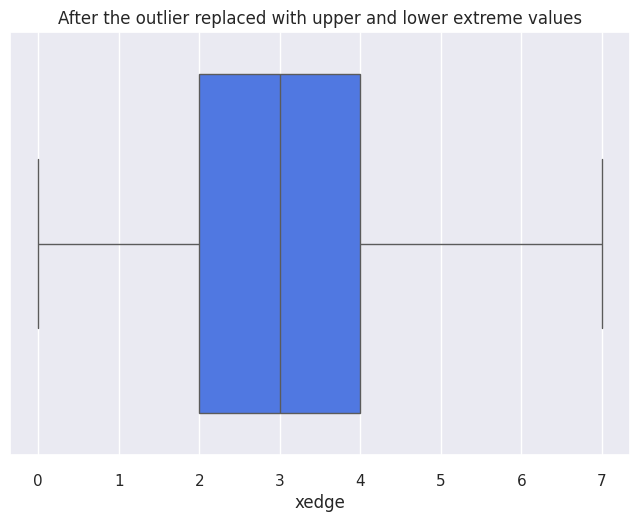

In [370]:
sns.boxplot(x = df["xedge"])
plt.xlabel("xedge")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

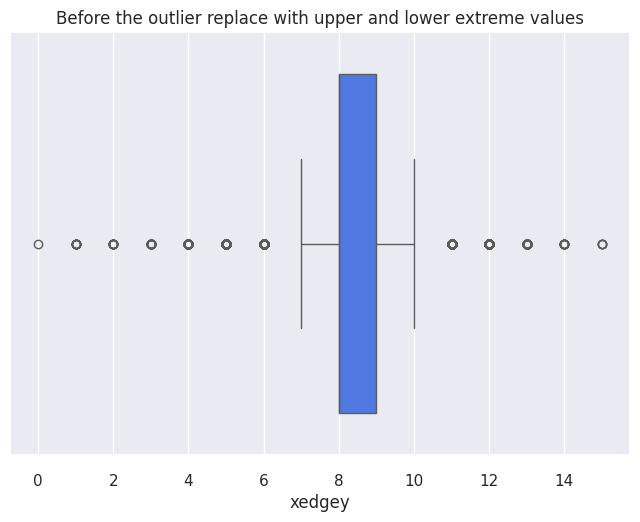

In [371]:
sns.boxplot(x = df["xedgey"])
plt.xlabel("xedgey")
plt.title("Before the outlier replace with upper and lower extreme values")

In [372]:
Outlier_detection(df, "xedgey")

(6.5, 10.5)

In [373]:
df.loc[df["xedgey"]>10.5, "xedgey"] = 10.5

In [374]:
df.loc[df["xedgey"]<6.5, "xedgey"] = 6.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

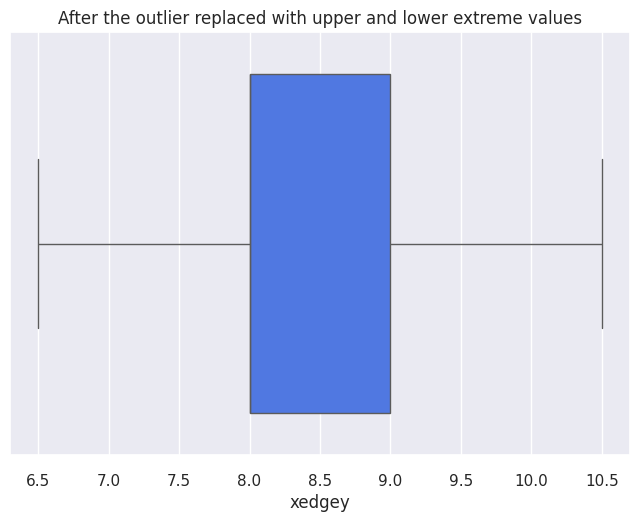

In [375]:
sns.boxplot(x = df["xedgey"])
plt.xlabel("xedgey")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

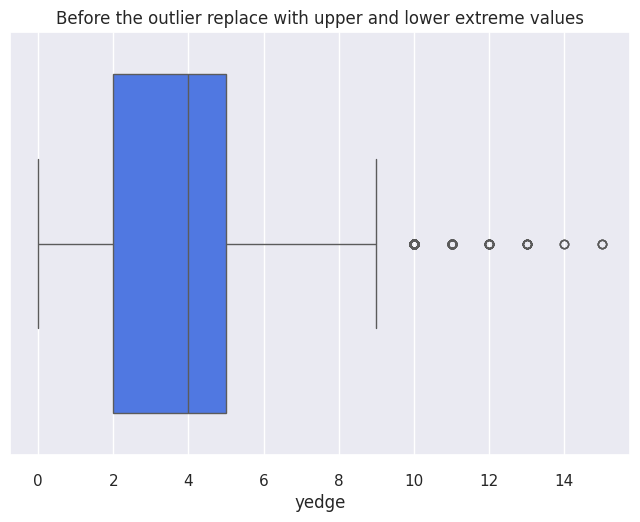

In [376]:
sns.boxplot(x = df["yedge"])
plt.xlabel("yedge")
plt.title("Before the outlier replace with upper and lower extreme values")

In [377]:
Outlier_detection(df, "yedge")

(-2.5, 9.5)

In [378]:
df.loc[df["yedge"]>9.5, "yedge"] = 9.5

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

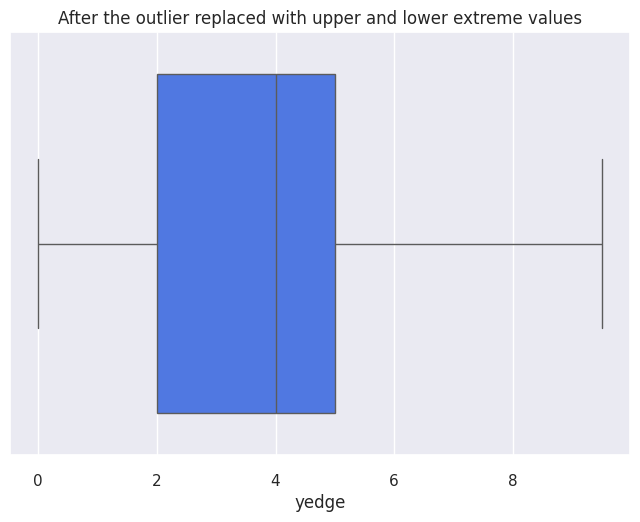

In [379]:
sns.boxplot(x = df["yedge"])
plt.xlabel("yedge")
plt.title("After the outlier replaced with upper and lower extreme values")

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

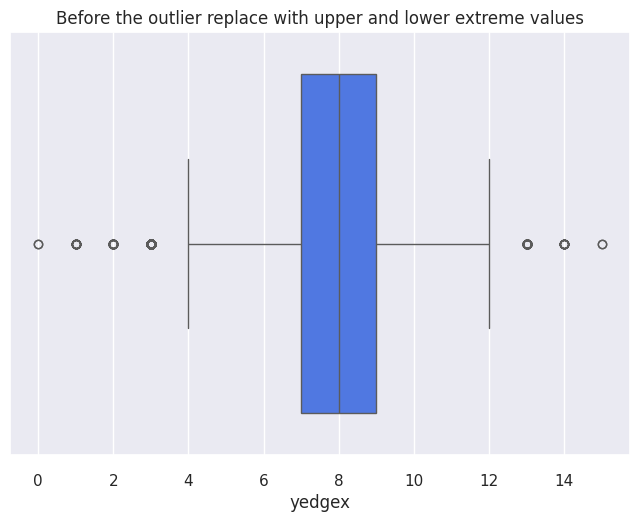

In [380]:
sns.boxplot(x = df["yedgex"])
plt.xlabel("yedgex")
plt.title("Before the outlier replace with upper and lower extreme values")

In [381]:
Outlier_detection(df, "yedgex")

(4.0, 12.0)

In [382]:
df.loc[df["yedgex"]>12.0, "yedgex"] = 12.0

In [383]:
df.loc[df["yedgex"]<4.0, "yedgex"] = 4.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

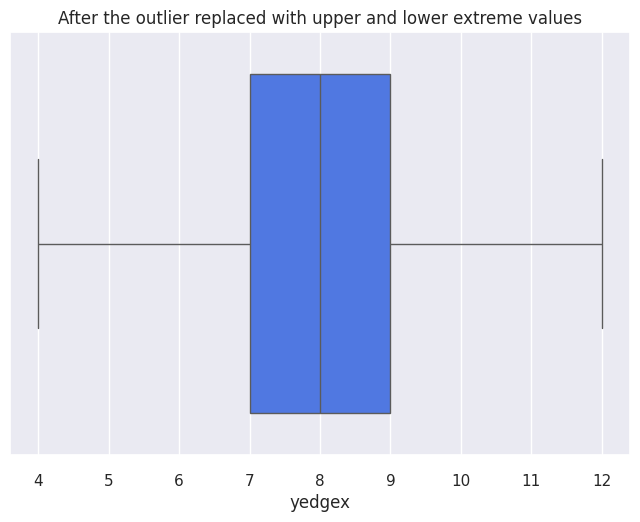

In [384]:
sns.boxplot(x = df["yedgex"])
plt.xlabel("yedgex")
plt.title("After the outlier replaced with upper and lower extreme values")

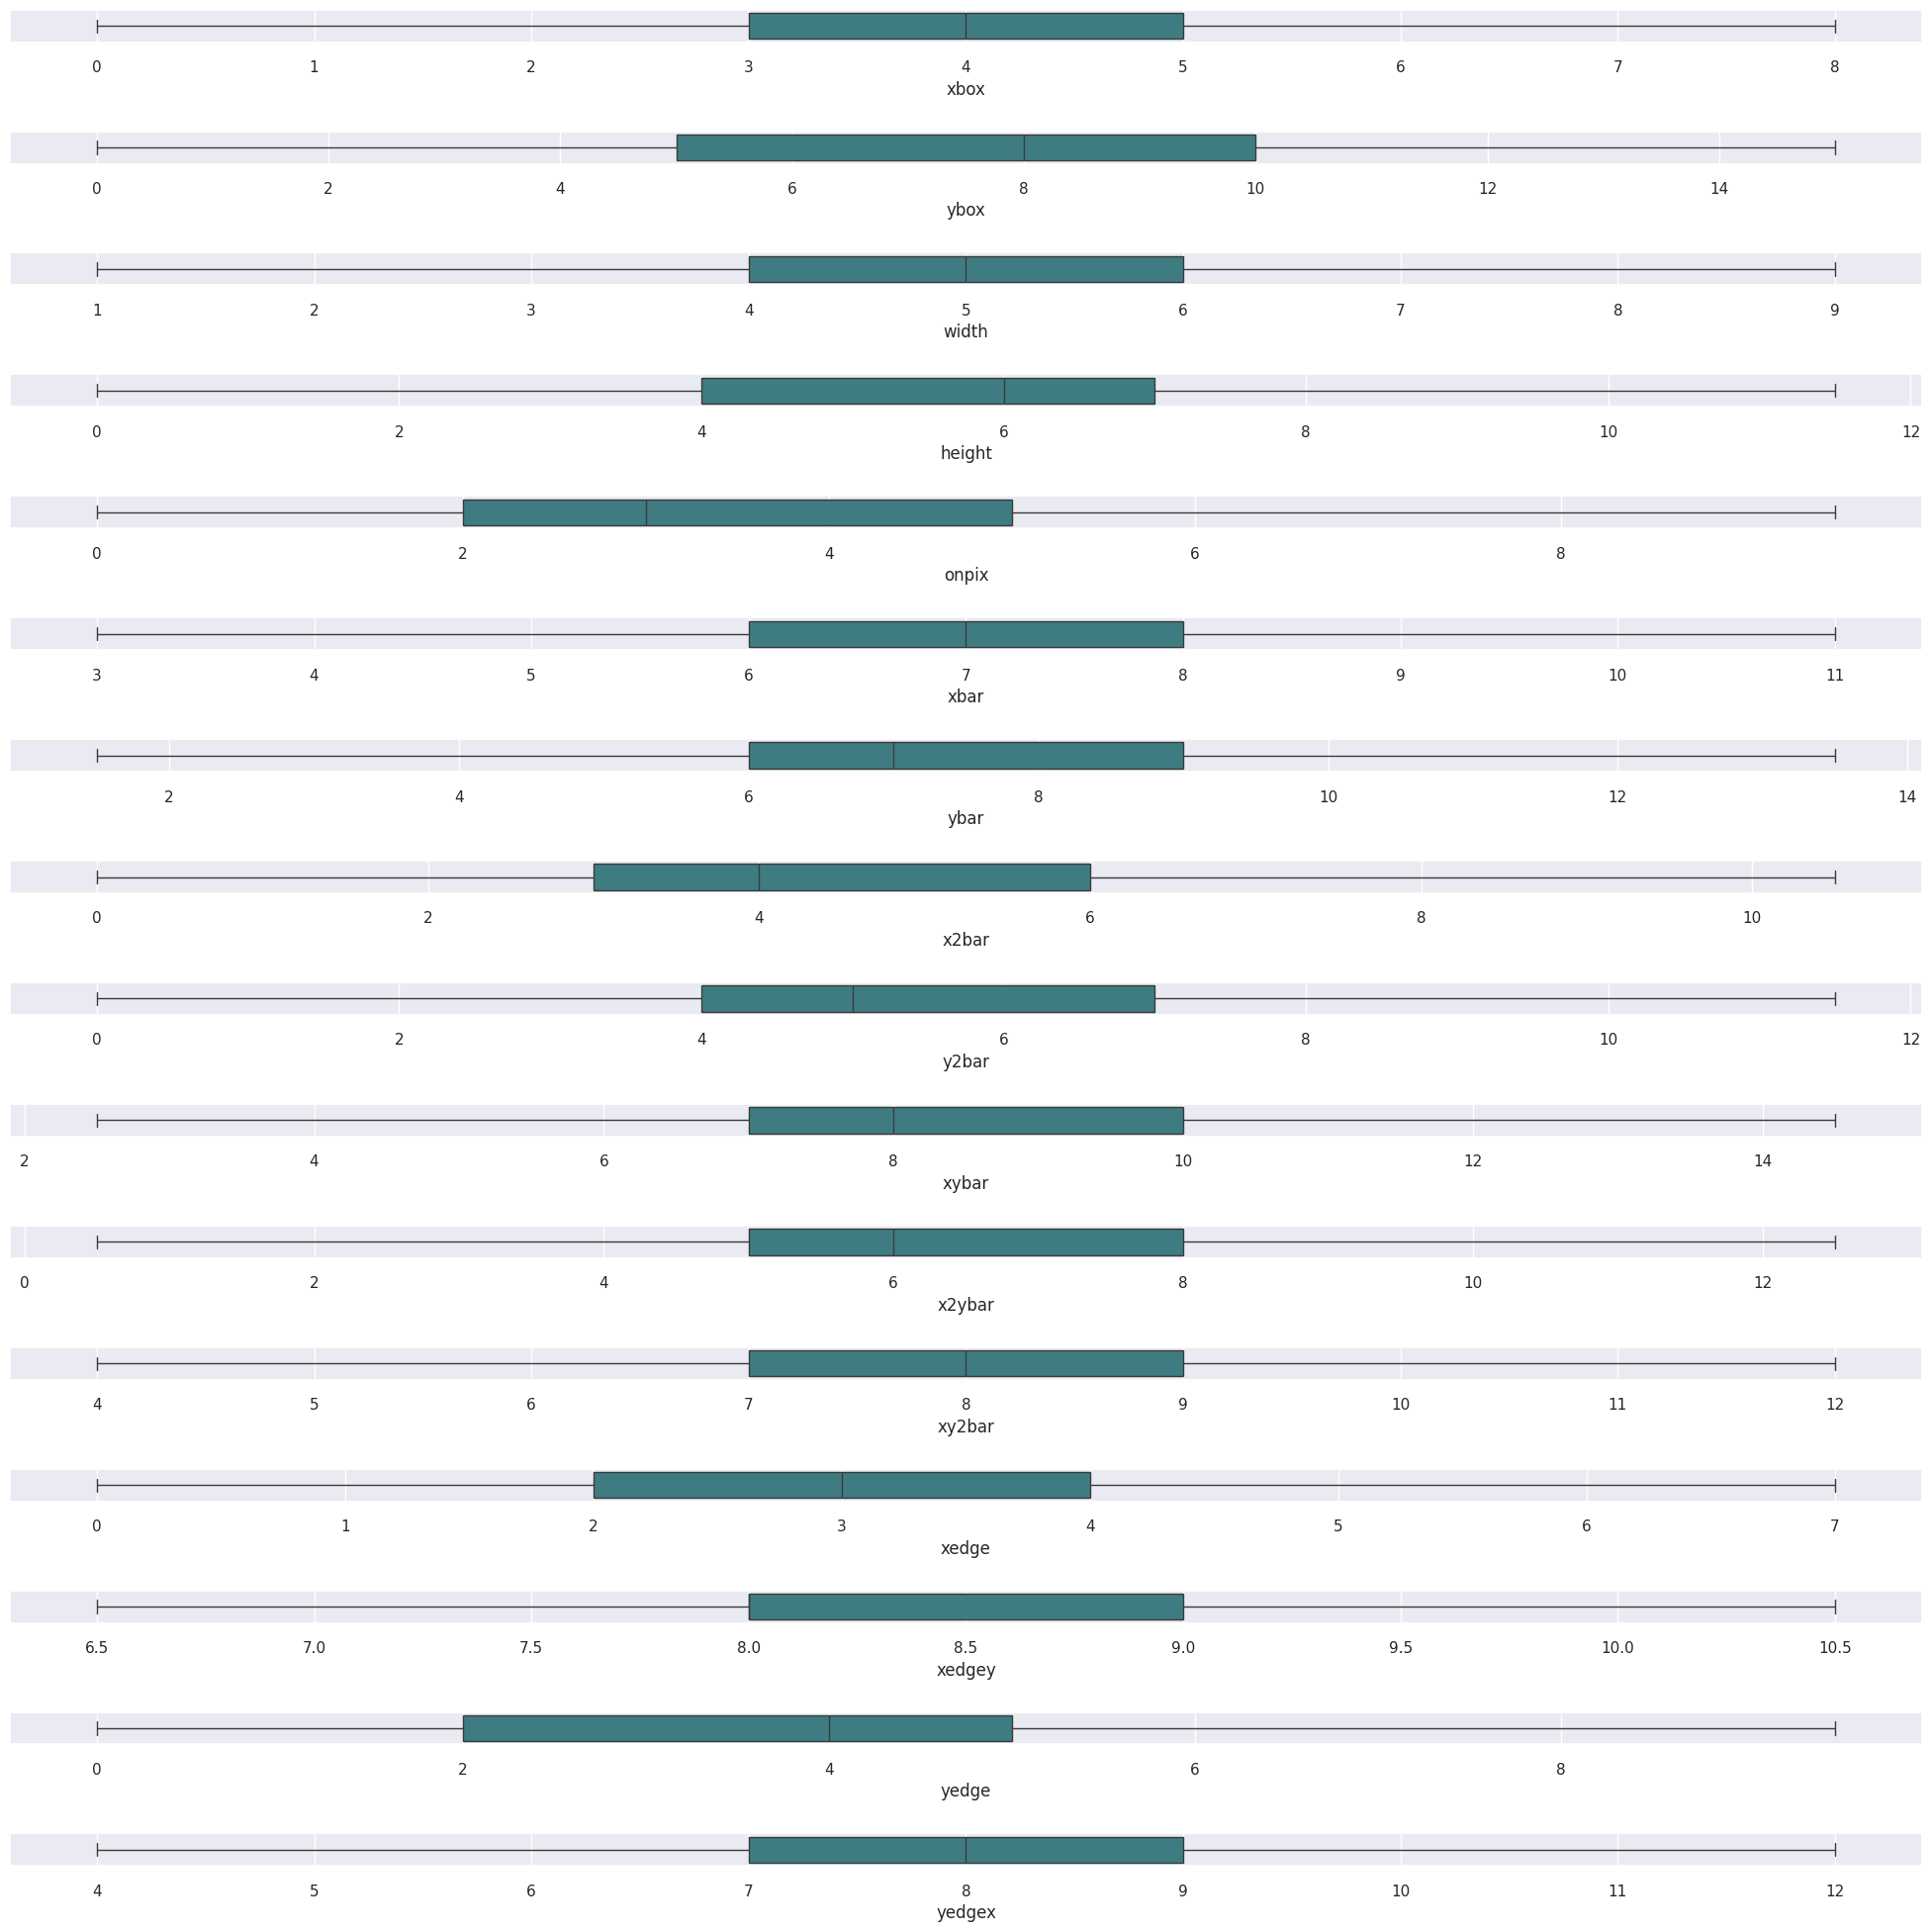

In [385]:
ot=df.copy()
fig, axes=plt.subplots(16,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='xbox',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='ybox',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='width',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='height',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='onpix',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='xbar',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='ybar',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='x2bar',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='y2bar',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='xybar',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='x2ybar',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='xy2bar',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='xedge',data=ot,palette='crest',ax=axes[12])
sns.boxplot(x='xedgey',data=ot,palette='crest',ax=axes[13])
sns.boxplot(x='yedge',data=ot,palette='crest',ax=axes[14])
sns.boxplot(x='yedgex',data=ot,palette='crest',ax=axes[15])
plt.tight_layout(pad=2.0)

In [386]:
#Scatter Plot and Correlation

In [387]:
#Label Enconding Methods

In [388]:
from sklearn.preprocessing import LabelEncoder

In [389]:
Label_encoder = LabelEncoder()

In [390]:
df["letter"] = Label_encoder.fit_transform(df["letter"])

In [391]:
df["letter"].unique()

array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11, 15,  4, 21, 24, 16, 20, 10, 25])

In [393]:
#Correlation coefficient

In [394]:
df.corr()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,1.000000,0.104495,-0.000023,0.094907,0.039939,-0.003779,-0.058929,0.314121,-0.126441,-0.005822,-0.084159,0.387342,-0.122578,0.086806,0.340345,-0.074499,-0.185795
xbox,0.104495,1.000000,0.758074,0.845199,0.675707,0.617585,-0.037837,0.036104,0.015599,0.040569,0.143251,0.037673,-0.044633,0.480672,0.109274,0.261507,-0.095603
ybox,-0.000023,0.758074,1.000000,0.668498,0.808549,0.539867,0.048618,-0.055752,-0.019379,0.078532,0.150827,-0.058700,-0.003528,0.270569,0.002981,0.214460,-0.029661
width,0.094907,0.845199,0.668498,1.000000,0.663235,0.757670,0.062468,0.009261,-0.107507,0.040450,0.083747,0.005659,-0.037108,0.538819,0.055771,0.234247,-0.108401
height,0.039939,0.675707,0.808549,0.663235,1.000000,0.642300,0.051298,-0.030393,0.096060,0.031202,-0.008118,-0.012359,0.032238,0.253508,0.020297,0.284785,-0.004752
onpix,-0.003779,0.617585,0.539867,0.757670,0.642300,1.000000,0.143033,-0.045001,0.008143,-0.089248,-0.119332,-0.077182,-0.029454,0.612995,0.013573,0.483886,-0.048314
xbar,-0.058929,-0.037837,0.048618,0.062468,0.051298,0.143033,1.000000,-0.411532,-0.073549,-0.136821,0.012318,-0.404079,-0.054871,0.147255,-0.273232,0.131711,0.267741
ybar,0.314121,0.036104,-0.055752,0.009261,-0.030393,-0.045001,-0.411532,1.000000,-0.103509,-0.049839,0.138148,0.609516,-0.288782,-0.049682,0.567515,-0.097435,-0.218054
x2bar,-0.126441,0.015599,-0.019379,-0.107507,0.096060,0.008143,-0.073549,-0.103509,1.000000,-0.143028,-0.319351,0.014073,0.088804,0.122088,-0.084888,0.088588,0.205426
y2bar,-0.005822,0.040569,0.078532,0.040450,0.031202,-0.089248,-0.136821,-0.049839,-0.143028,1.000000,0.129889,-0.047392,0.088427,-0.393764,-0.090193,0.244259,-0.062658


<Axes: >

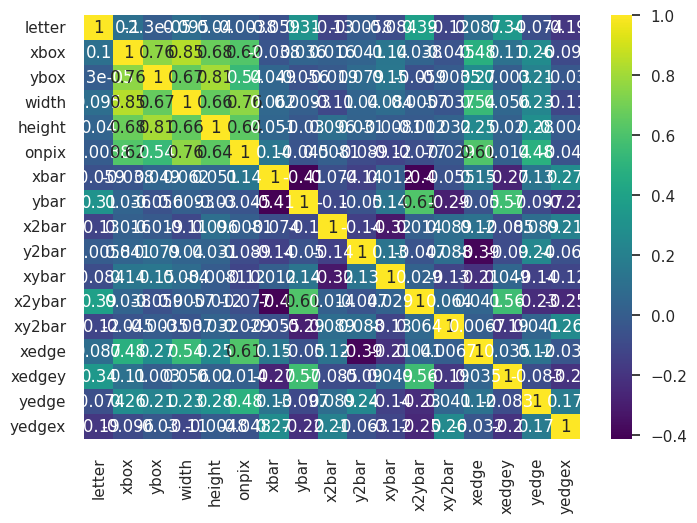

In [395]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis")

In [396]:
#StandardScaler

In [397]:
from sklearn.preprocessing import StandardScaler

In [398]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5.0,1.0,8,13.0,0.0,6.0,6.0,10.0,8,0,8.0,0.0,8
1,8,5,12,3,7.0,2.0,10,5.0,5.0,4.0,13.0,3.0,9,2,8.0,4.0,10
2,3,4,11,6,8.0,6.0,10,6.0,2.0,6.0,10.0,3.0,7,3,7.0,3.0,9
3,13,7,11,6,6.0,3.0,5,9.0,4.0,6.0,4.0,4.0,10,6,10.0,2.0,8
4,6,2,1,3,1.0,1.0,8,6.0,6.0,6.0,6.0,5.0,9,1,7.0,5.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19,5,8,7,7.0,7.0,7,9.0,4.0,8.0,7.0,7.0,8,3,10.0,8.0,6
19995,3,2,2,3,3.0,2.0,7,7.0,7.0,6.0,6.0,6.0,4,2,8.0,3.0,7
19996,2,7,10,8,8.0,4.0,4,8.0,6.0,9.0,12.0,9.0,12,2,9.0,3.0,7
19997,19,6,9,6,7.0,5.0,6,11.0,3.0,7.0,11.0,9.0,5,2,10.5,2.0,4


In [399]:
x = df.drop(columns=['letter'])
y = df['letter']

In [400]:
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5.0,1.0,8,13.0,0.0,6.0,6.0,10.0,8,0,8.0,0.0,8
1,5,12,3,7.0,2.0,10,5.0,5.0,4.0,13.0,3.0,9,2,8.0,4.0,10
2,4,11,6,8.0,6.0,10,6.0,2.0,6.0,10.0,3.0,7,3,7.0,3.0,9
3,7,11,6,6.0,3.0,5,9.0,4.0,6.0,4.0,4.0,10,6,10.0,2.0,8
4,2,1,3,1.0,1.0,8,6.0,6.0,6.0,6.0,5.0,9,1,7.0,5.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,5,8,7,7.0,7.0,7,9.0,4.0,8.0,7.0,7.0,8,3,10.0,8.0,6
19995,2,2,3,3.0,2.0,7,7.0,7.0,6.0,6.0,6.0,4,2,8.0,3.0,7
19996,7,10,8,8.0,4.0,4,8.0,6.0,9.0,12.0,9.0,12,2,9.0,3.0,7
19997,6,9,6,7.0,5.0,6,11.0,3.0,7.0,11.0,9.0,5,2,10.5,2.0,4


In [401]:
y

0        19
1         8
2         3
3        13
4         6
         ..
19994    19
19995     3
19996     2
19997    19
19999     0
Name: letter, Length: 18668, dtype: int64

In [402]:
#Feature Selection

In [403]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
sns.set_theme(style='darkgrid', palette='rainbow')

In [404]:
#Univariate Selection
#We use Chi2 test to perform the feature selection.
#When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect.
#In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [405]:
#Chi square for feature selection

In [406]:
test = SelectKBest(score_func=chi2, k = 5)

test.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x7916daa20160>)

In [407]:
x.columns

Index(['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge',
       'yedgex'],
      dtype='object')

In [408]:
test.scores_

array([  980.31024638,   135.54916608,  1317.87380511,   237.12416235,
        2529.75674663,  2630.33878112,  7494.38649055,  8469.65995923,
        9068.27964608,  3795.28452354, 11366.82930302,  4608.26541043,
       13590.6401148 ,  1885.05777811, 13157.93181595,  1666.23790789])

In [409]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
letter,18668.0,12.474555,7.507604,0.0,6.0,13.0,19.0,25.0
xbox,18668.0,4.107832,1.761202,0.0,3.0,4.0,5.0,8.0
ybox,18668.0,7.244322,3.187660,0.0,5.0,8.0,10.0,15.0
width,18668.0,5.250750,1.848601,1.0,4.0,5.0,6.0,9.0
height,18668.0,5.502518,2.164028,0.0,4.0,6.0,7.0,11.5
onpix,18668.0,3.638740,2.088274,0.0,2.0,3.0,5.0,9.5
xbar,18668.0,6.936415,1.848953,3.0,6.0,7.0,8.0,11.0
ybar,18668.0,7.525311,2.278087,1.5,6.0,7.0,9.0,13.5
x2bar,18668.0,4.504928,2.383960,0.0,3.0,4.0,6.0,10.5
y2bar,18668.0,5.192040,2.289683,0.0,4.0,5.0,7.0,11.5


In [410]:
pd.DataFrame({
    "Features": x.columns,
    "Test": test.scores_
})

,Features,Test
0,xbox,980.310246
1,ybox,135.549166
2,width,1317.873805
3,height,237.124162
4,onpix,2529.756747
5,xbar,2630.338781
6,ybar,7494.386491
7,x2bar,8469.659959
8,y2bar,9068.279646
9,xybar,3795.284524


In [411]:
pd.DataFrame(test.scores_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,980.310246,135.549166,1317.873805,237.124162,2529.756747,2630.338781,7494.386491,8469.659959,9068.279646,3795.284524,11366.829303,4608.26541,13590.640115,1885.057778,13157.931816,1666.237908


In [412]:
univariate = pd.DataFrame(test.scores_).T
univariate
univariate.columns = x.columns
univariate

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,980.310246,135.549166,1317.873805,237.124162,2529.756747,2630.338781,7494.386491,8469.659959,9068.279646,3795.284524,11366.829303,4608.26541,13590.640115,1885.057778,13157.931816,1666.237908


In [413]:
univariate_Import_Columns = "xedge, yedge, x2ybar, y2bar, x2bar, ybar, xy2bar, xybar, xbar, onpix, yedgex"

In [414]:
univariate_Import_Columns

'xedge, yedge, x2ybar, y2bar, x2bar, ybar, xy2bar, xybar, xbar, onpix, yedgex'

In [416]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [417]:
x

array([[-1.19684598,  0.23706997, -1.21757472, ..., -0.30206205,
        -1.51472165,  0.12864506],
       [ 0.50658136,  1.49194265, -1.21757472, ..., -0.30206205,
         0.08800032,  1.37393722],
       [-0.06122776,  1.17822448,  0.40531732, ..., -1.11347214,
        -0.31268017,  0.75129114],
       ...,
       [ 1.64219958,  0.86450631,  1.48724534, ...,  0.50934803,
        -0.31268017, -0.49400103],
       [ 1.07439047,  0.55078814,  0.40531732, ...,  1.72646317,
        -0.71336066, -2.36193928],
       [-0.06122776,  0.55078814,  0.40531732, ..., -1.11347214,
        -0.71336066,  0.12864506]])

In [418]:
#Recursive Feature Elimination

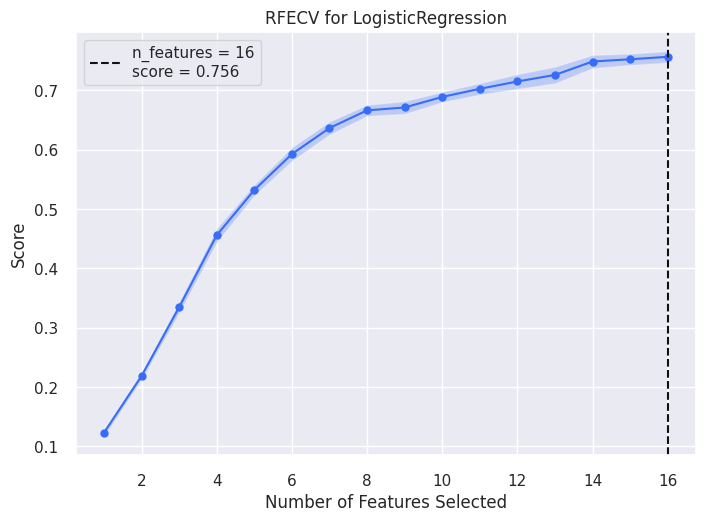

In [419]:
rfe = rfecv(LogisticRegression(),x,y)

In [420]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [428]:
rfe.Sel = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x_columns
})

In [429]:
rfe.Sel

,Ranking,Features
0,1,letter
1,1,xbox
2,1,ybox
3,1,width
4,1,height
5,1,onpix
6,1,xbar
7,1,ybar
8,1,x2bar
9,1,y2bar


In [282]:
#Tree Based method

In [422]:
dt = DecisionTreeClassifier()

dt.fit(x,y)

DecisionTreeClassifier()

In [423]:
dt.feature_importances_

array([0.00916457, 0.01884482, 0.00843062, 0.0128149 , 0.01947961,
       0.0468723 , 0.05980941, 0.07968341, 0.12390218, 0.06727643,
       0.07305819, 0.07079058, 0.16849595, 0.08241332, 0.10715834,
       0.05180538])

In [425]:
x_columns = df.columns[:x.shape[1]]

In [426]:
ig_sel = pd.DataFrame({
    'IG': dt.feature_importances_,
    'Features' : x_columns
})

In [427]:
ig_sel

,IG,Features
0,0.009165,letter
1,0.018845,xbox
2,0.008431,ybox
3,0.012815,width
4,0.019480,height
5,0.046872,onpix
6,0.059809,xbar
7,0.079683,ybar
8,0.123902,x2bar
9,0.067276,y2bar


In [287]:
ig_sel.sort_values(by='IG', ascending=False)

,IG,Features
12,0.165704,xedge
8,0.125632,y2bar
14,0.107221,yedge
7,0.081699,x2bar
13,0.080063,xedgey
10,0.075160,x2ybar
11,0.070549,xy2bar
9,0.065375,xybar
6,0.059416,ybar
15,0.053075,yedgex


In [288]:
univariate_Import_Columns

'xedge, yedge, x2ybar, y2bar, x2bar, ybar, xy2bar, xybar, xbar, onpix, yedgex'

In [289]:
rfe.Sel

,Ranking,Features
0,1,xbox
1,1,ybox
2,1,width
3,1,height
4,1,onpix
5,1,xbar
6,1,ybar
7,1,x2bar
8,1,y2bar
9,1,xybar


In [292]:
#Model Builidng

In [430]:
x

array([[-1.19684598,  0.23706997, -1.21757472, ..., -0.30206205,
        -1.51472165,  0.12864506],
       [ 0.50658136,  1.49194265, -1.21757472, ..., -0.30206205,
         0.08800032,  1.37393722],
       [-0.06122776,  1.17822448,  0.40531732, ..., -1.11347214,
        -0.31268017,  0.75129114],
       ...,
       [ 1.64219958,  0.86450631,  1.48724534, ...,  0.50934803,
        -0.31268017, -0.49400103],
       [ 1.07439047,  0.55078814,  0.40531732, ...,  1.72646317,
        -0.71336066, -2.36193928],
       [-0.06122776,  0.55078814,  0.40531732, ..., -1.11347214,
        -0.71336066,  0.12864506]])

In [431]:
y

0        19
1         8
2         3
3        13
4         6
         ..
19994    19
19995     3
19996     2
19997    19
19999     0
Name: letter, Length: 18668, dtype: int64

In [432]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20, random_state=1)

In [433]:
xtrain

array([[-0.06122776, -0.0766482 , -0.1356467 , ..., -0.30206205,
         0.48868081,  1.37393722],
       [-0.06122776, -0.39036637,  0.94628133, ..., -1.11347214,
        -0.71336066,  0.12864506],
       [-0.06122776,  0.55078814, -0.67661071, ..., -0.30206205,
        -0.31268017, -1.73929319],
       ...,
       [ 1.64219958,  2.11937899,  0.94628133, ...,  0.50934803,
         1.2900418 ,  0.12864506],
       [-1.76465509, -1.33152088, -2.29950275, ..., -0.30206205,
        -0.71336066,  0.12864506],
       [-0.06122776,  0.23706997, -0.1356467 , ...,  1.32075812,
        -0.31268017, -1.73929319]])

In [457]:
#Initialize model
ann = Sequential()

#Add hidden layer
ann.add(Dense(units=68,activation='relu'))

#Add output layer
ann.add(Dense(units=1, activation='softmax'))

#Establish the connection between the layers
ann.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics='accuracy')

#Fit the data
ann.fit(xtrain,ytrain, epochs=100)

Epoch 1/100
467/467 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0396
Epoch 2/100
467/467 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0396
Epoch 3/100
467/467 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0396
Epoch 4/100
467/467 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0396
Epoch 5/100
467/467 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0396
Epoch 6/100
467/467 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0396
Epoch 7/100
467/467 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0396
Epoch 8/100
467/467 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0396
Epoch 9/100
467/467 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0396
Epoch 10/100
467/467 [==============================] -

In [459]:
loss, accuracy = ann.evaluate(xtest, ytest)

117/117 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0370


In [460]:
ypred = ann.predict(xtest)
ypred

117/117 [==============================] - 0s 2ms/step


array([[0.99999994],
       [0.99999994],
       [0.99999994],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]], dtype=float32)

In [461]:
ytest

12583     5
10465    14
13430    12
10253    25
15042    21
         ..
11528     2
8083      4
4771     18
7718      3
7966     14
Name: letter, Length: 3734, dtype: int64

In [462]:
#Hyperparameter Tuning

In [466]:
!pip install -U keras-tuner

In [467]:
import keras_tuner as kt

In [468]:
def optimizer_selection(hp):
    #initialize the model
    model = Sequential()
    #Add hidden layer
    model.add(Dense(units=10, activation='relu'))
    #Add output layer
    model.add(Dense(units=1, activation='softmax'))
    #Optimizer selection
    optim = hp.Choice('optimizer', values = ['sgd','adam','rmsprop'])
    model.compile(optimizer=optim, loss = 'categorical_crossentropy', metrics = 'accuracy')
    return model

In [469]:
tuner = kt.RandomSearch(
    optimizer_selection,
    objective='val_accuracy',
    max_trials=3
)

Reloading Tuner from ./untitled_project/tuner0.json


In [470]:
tuner.search(xtrain,ytrain, epochs = 3, validation_data = (xtest,ytest))

In [471]:
  tuner.get_best_hyperparameters()[0].values

{'optimizer': 'sgd'}

In [472]:
model = tuner.get_best_models(num_models=1)[0]
model.fit(xtrain,ytrain, epochs = 100, validation_data = (xtest,ytest))

Epoch 1/100
467/467 [==============================] - 4s 6ms/step - loss: nan - accuracy: 0.0404 - val_loss: nan - val_accuracy: 0.0410
Epoch 2/100
467/467 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0404 - val_loss: nan - val_accuracy: 0.0410
Epoch 3/100
467/467 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.0404 - val_loss: nan - val_accuracy: 0.0410
Epoch 4/100
467/467 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0404 - val_loss: nan - val_accuracy: 0.0410
Epoch 5/100
467/467 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0404 - val_loss: nan - val_accuracy: 0.0410
Epoch 6/100
467/467 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0404 - val_loss: nan - val_accuracy: 0.0410
Epoch 7/100
467/467 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0404 - val_loss: nan - val_accuracy: 0.0410
Epoch 8/100
467/467 [====================

In [473]:
model.evaluate(xtrain,ytrain)

467/467 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0404


[nan, 0.0403776615858078]

In [519]:
def hyper(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value = 1,max_value=10)):
        if counter ==0:
            model.add(Dense(hp.Int('units'+str(i),min_value=10,max_value=140,step=10),
                            activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid', 'softmax']),
                            input_dim = 13))
        else:
          model.add(Dense(
              hp.Int('units'+str(i),min_value=10,max_value=140,step=10),
              activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid', 'softmax'])))
    counter+=1
    model.add(Dense(units = 1,activation='softmax'))
    model.compile(optimizer = hp.Choice('optimizer',values = ['adam','rmsprop','sgd']),
                loss = 'categorical_crossentropy',metrics = 'accuracy')
    return model

In [520]:
tuner = kt.RandomSearch(hyper,
                        objective = 'val_accuracy',
                        max_trials = 3)

Reloading Tuner from ./untitled_project/tuner0.json


In [521]:
tuner.search(xtrain,ytrain,epochs = 5, validation_data = (xtest,ytest))

In [522]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'sgd'}

In [523]:
tuned_model = tuner.get_best_models(num_models=1)[0]

ValueError: Received incompatible tensor with shape (16, 10) when attempting to restore variable with shape (13, 10) and name dense/kernel:0.